# `mxalign`: Meteo-xAlign

**An xarray based package for alignment of meteorological data**

When loading a `xr.Dataset` with the `mxalign` package it attaches Properties along 3 axes:

- **space**: _grid_, _point_
- **time**: _forecast_, _observation_, _climatology_
- **uncertainty**: _deterministic_, _ensemble_, _quantile_

In [4]:
import xarray as xr
import numpy as np
import os

# netCDF file produced by anemoi-inference
dir_fcst = '/scratch/project_465000527/vandenbl/sg-la-comparison/inference-out/la-1024-01-ea-00'
fname_fcst = '2020020100.nc'

# Using xarray to open the netCDF-file
ds_fcst1 = xr.open_dataset(os.path.join(dir_fcst, fname_fcst))
ds_fcst1

<xarray.Dataset> Size: 9GB
Dimensions:         (values: 1142761, time: 25)
Coordinates:
  * time            (time) datetime64[ns] 200B 2020-02-01 ... 2020-02-07
Dimensions without coordinates: values
Data variables: (12/81)
    latitude        (values) float32 5MB ...
    longitude       (values) float32 5MB ...
    10u             (time, values) float32 114MB ...
    10v             (time, values) float32 114MB ...
    2d              (time, values) float32 114MB ...
    2t              (time, values) float32 114MB ...
    ...              ...
    z_500           (time, values) float32 114MB ...
    z_700           (time, values) float32 114MB ...
    z_850           (time, values) float32 114MB ...
    z_925           (time, values) float32 114MB ...
    z               (time, values) float32 114MB ...
    tp              (time, values) float32 114MB ...

In [5]:
# Using mxalign to open the netCDF-file
import mxalign as mx
ds_fcst2 = mx.load("anemoi-inference",os.path.join(dir_fcst,fname_fcst))
ds_fcst2

<xarray.Dataset> Size: 9GB
Dimensions:         (grid_index: 1142761, reference_time: 1, lead_time: 25)
Coordinates:
    latitude        (grid_index) float32 5MB 20.29 20.31 20.32 ... 63.81 63.77
    longitude       (grid_index) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
  * reference_time  (reference_time) datetime64[ns] 8B 2020-02-01
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
Dimensions without coordinates: grid_index
Data variables: (12/79)
    10u             (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    10v             (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2d              (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2t              (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_700           (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_850           (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_925           (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z               (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    tp              (reference_time, lead_time, grid_index) float32 114MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
Attributes:
    properties:  {'space': 'grid', 'time': 'forecast', 'uncertainty': 'determ...

In [6]:
# The type of datasets is uniquely defined by its properties
ds_fcst2.attrs["properties"]

{'space': 'grid', 'time': 'forecast', 'uncertainty': 'deterministic'}

## Properties
Every property comes with a _contract_: a required set of dimensions, dimension names and coordinates

### Space
**GRID**
- required dimensions: `(grid_index)` or `(lat, lon)` or `(yc, xc)`
- required coordinates: `(lat, lon)`

**OBSERVATION**
- required dimensions: `(point_index)`
- required dimensions: `(lat, lon)`

### Time
**FORECAST**
- required dimensions: `(reference_time, lead_time)`
- required coordinates: `(reference_time, lead_time)`

**OBSERVATION**
- required dimensions: `(valid_time)`
- required coordinates: `(valid_time)`

**CLIMATOLOGY**
TBD

### Uncertainty
**DETERMINISTIC**
- required dimensions: `null`
- required coordinates: `null`

**ENSEMBLE**
- required dimensions: `(member)`
- required coordinates: `(member)`

**QUANTILE**
- required dimensions: `(quantile)`
- required coordinates: `(quantile)`

When a dataset is loaded with `mxalign` the above specification get validated.

## Accessors
With datesets defined along the three Property-axes, alignment methods can be infered from the datasets themselves.

For this the `mxalign` package adds a `time` and `space` accessor to `xr.Datasets`

In [7]:
fname_fcst = ["2020020100.nc", "2020020200.nc", "2020020300.nc"]
ds_fcst = mx.load("anemoi-inference", [os.path.join(dir_fcst, fname) for fname in fname_fcst])
ds_fcst

<xarray.Dataset> Size: 27GB
Dimensions:         (reference_time: 3, lead_time: 25, grid_index: 1142761)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    latitude        (grid_index) float32 5MB 20.29 20.31 20.32 ... 63.81 63.77
    longitude       (grid_index) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
Dimensions without coordinates: grid_index
Data variables: (12/79)
    10u             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    10v             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2d              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2t              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_700           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_850           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_925           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z               (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    tp              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
Attributes:
    properties:  {'space': 'grid', 'time': 'forecast', 'uncertainty': 'determ...

In [8]:
# TIME accessor
if ds_fcst.time.is_forecast():
    print("Dataset is a forecast")
if ds_fcst.time.is_observation():
    print("Dataset is an observation")

# Add an auxiliary valid time coordinate
ds_fcst = ds_fcst.time.add_valid_time()
ds_fcst


Dataset is a forecast


<xarray.Dataset> Size: 27GB
Dimensions:         (reference_time: 3, lead_time: 25, grid_index: 1142761)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    valid_time      (reference_time, lead_time) datetime64[ns] 600B 2020-02-0...
    latitude        (grid_index) float32 5MB 20.29 20.31 20.32 ... 63.81 63.77
    longitude       (grid_index) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
Dimensions without coordinates: grid_index
Data variables: (12/79)
    10u             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    10v             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2d              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2t              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_700           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_850           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_925           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z               (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    tp              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
Attributes:
    properties:  {'space': 'grid', 'time': 'forecast', 'uncertainty': 'determ...

In [9]:
# SPACE accessor
import cartopy.crs as ccrs

# Define a Coordinate Reference System (CRS)
globe_cerra = ccrs.Globe(semimajor_axis=6371229.0,semiminor_axis=6371229.0)
crs_cerra = ccrs.LambertConformal(
    central_longitude=8.0,
    central_latitude=50.0,
    standard_parallels=[50.0, 50.0],
    globe=globe_cerra
)

# Add it to the dataset (this will enable other functionality)
ds_fcst = ds_fcst.space.add_crs(crs_cerra)
ds_fcst

<xarray.Dataset> Size: 27GB
Dimensions:         (reference_time: 3, lead_time: 25, grid_index: 1142761)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    valid_time      (reference_time, lead_time) datetime64[ns] 600B 2020-02-0...
    latitude        (grid_index) float32 5MB 20.29 20.31 20.32 ... 63.81 63.77
    longitude       (grid_index) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
Dimensions without coordinates: grid_index
Data variables: (12/79)
    10u             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    10v             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2d              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2t              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_700           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_850           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_925           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z               (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    tp              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
Attributes:
    properties:  {'space': 'grid', 'time': 'forecast', 'uncertainty': 'determ...
    crs:         +proj=lcc +ellps=WGS84 +a=6371229.0 +b=6371229.0 +lon_0=8.0 ...

In [10]:
# Add native x and y coordinates (in this case Lambert Conformal)
ds_fcst = ds_fcst.space.add_xy()

In [11]:
# Adding a grid-mapping will enable unstacking of the grid
ds_fcst = ds_fcst.space.add_grid_mapping("cerra")
ds_fcst

<xarray.Dataset> Size: 27GB
Dimensions:         (reference_time: 3, lead_time: 25, grid_index: 1142761)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    valid_time      (reference_time, lead_time) datetime64[ns] 600B 2020-02-0...
    latitude        (grid_index) float32 5MB 20.29 20.31 20.32 ... 63.81 63.77
    longitude       (grid_index) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
    xc              (grid_index) float64 9MB -2.937e+06 -2.931e+06 ... 2.937e+06
    yc              (grid_index) float64 9MB -2.937e+06 -2.937e+06 ... 2.937e+06
Dimensions without coordinates: grid_index
Data variables: (12/79)
    10u             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    10v             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2d              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2t              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_700           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_850           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_925           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z               (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    tp              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
Attributes:
    properties:    {'space': 'grid', 'time': 'forecast', 'uncertainty': 'dete...
    crs:           +proj=lcc +ellps=WGS84 +a=6371229.0 +b=6371229.0 +lon_0=8....
    grid_mapping:  {'lon_ll': -17.4859, 'lat_ll': 20.2923, 'lon_ur': 74.1051,...

In [12]:
# Unstack
ds_fcst = ds_fcst.space.unstack()
ds_fcst

<xarray.Dataset> Size: 27GB
Dimensions:         (yc: 1069, xc: 1069, reference_time: 3, lead_time: 25)
Coordinates:
  * yc              (yc) float64 9kB -2.937e+06 -2.931e+06 ... 2.937e+06
  * xc              (xc) float64 9kB -2.937e+06 -2.931e+06 ... 2.937e+06
    latitude        (yc, xc) float32 5MB 20.29 20.31 20.32 ... 63.84 63.81 63.77
    longitude       (yc, xc) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    valid_time      (reference_time, lead_time) datetime64[ns] 600B 2020-02-0...
Data variables: (12/79)
    10u             (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    10v             (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    2d              (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    2t              (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    z_700           (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    z_850           (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    z_925           (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    z               (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
    tp              (reference_time, lead_time, yc, xc) float32 343MB dask.array<chunksize=(1, 25, 1069, 1069), meta=np.ndarray>
Attributes:
    properties:    {'space': 'grid', 'time': 'forecast', 'uncertainty': 'dete...
    crs:           +proj=lcc +ellps=WGS84 +a=6371229.0 +b=6371229.0 +lon_0=8....
    grid_mapping:  {'nx': 1069, 'ny': 1069, 'lon_ll': -17.4859, 'lat_ll': 20....

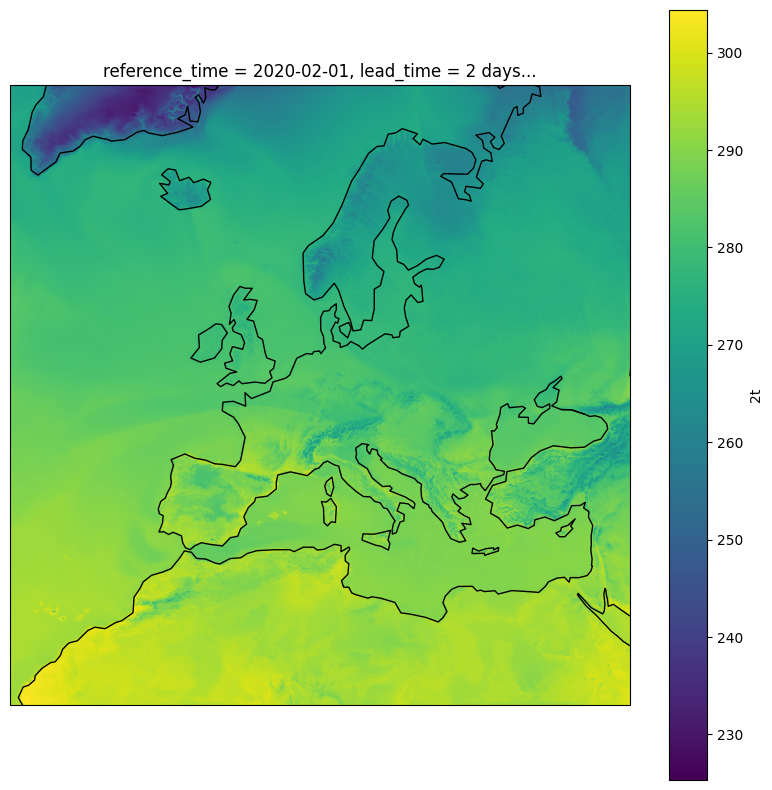

In [13]:
# Now we can plot the data on the native grid
import matplotlib.pyplot as plt
_ = ds_fcst["2t"].isel(reference_time=0,lead_time=10).plot(x="xc",y="yc", figsize=(10,10), subplot_kws={"projection": ds_fcst.attrs["crs"]})
_ = plt.gca().coastlines()

## Loading
All loading of datasets is done through the central `mxalign.load` function

In [14]:
# check available loaders
mx.available_loaders()

['anemoi-inference', 'point-forecast', 'point-observation']

Since you know your dataset best you can bring your own loader.  
The final result of your loader should be an `xarray.Dataset` with a property on each of the 3 axes and the correct dimensions and coordinates.  
To register your loader use the `@register_loader(name, properties)` decorator

In [16]:
ds_obs = mx.load("point-observation", files="/scratch/project_465002133/datasets/observations/cerra_synops_2020.nc")
ds_obs

<xarray.Dataset> Size: 2GB
Dimensions:          (point_index: 1706, valid_time: 20201)
Coordinates:
    code             (point_index) int64 14kB 1203 1205 1209 ... 26966 26976
    station_name     (point_index) <U20 136kB 'Krakenes' ... 'Krasnaja Gora'
    station_country  (point_index) <U20 136kB 'Norway' ... 'U.S.S.R.(Europe)'
    latitude         (point_index) float64 14kB 62.03 62.33 62.18 ... 52.9 53.02
    longitude        (point_index) float64 14kB 4.983 5.267 6.067 ... 30.03 31.6
    altitude         (point_index) float64 14kB nan 38.0 74.0 ... nan nan nan
  * valid_time       (valid_time) datetime64[ns] 162kB 2020-01-01 ... 2021-01-12
Dimensions without coordinates: point_index
Data variables:
    10wdir           (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    10si             (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    2t               (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    2d               (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    msl              (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    2r               (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    2t_max           (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
    2t_min           (point_index, valid_time) float64 276MB dask.array<chunksize=(1190, 14097), meta=np.ndarray>
Attributes:
    properties:  {'space': 'point', 'time': 'observation', 'uncertainty': 'de...

## Aligment
Aligmnet is space and time can now be automatically inferred from the dataset themselves

In [17]:
# Align a Grid with Point observations in space:
# --> This means interpolation
ds_fcst_aligned, ds_obs_aligned = ds_fcst.space.align_with(ds_obs)
ds_fcst_aligned


<xarray.Dataset> Size: 40MB
Dimensions:         (reference_time: 3, lead_time: 25, point_index: 1706)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    valid_time      (reference_time, lead_time) datetime64[ns] 600B 2020-02-0...
    latitude        (point_index) float64 14kB 62.03 62.33 62.18 ... 52.9 53.02
    longitude       (point_index) float64 14kB 4.983 5.267 6.067 ... 30.03 31.6
    xc              (point_index) float64 14kB -1.612e+05 ... 1.555e+06
    yc              (point_index) float64 14kB 1.352e+06 1.386e+06 ... 5.83e+05
Dimensions without coordinates: point_index
Data variables: (12/79)
    10u             (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    10v             (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    2d              (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    2t              (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z_700           (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z_850           (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z_925           (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z               (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    tp              (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
Attributes:
    properties:    {'space': 'point', 'time': 'forecast', 'uncertainty': 'det...
    crs:           +proj=lcc +ellps=WGS84 +a=6371229.0 +b=6371229.0 +lon_0=8....
    grid_mapping:  {'nx': 1069, 'ny': 1069, 'lon_ll': -17.4859, 'lat_ll': 20....

If you want to interpolate more than 1 dataset with a target dataset you can use the main `mxalign.interpolate` function. 

In [50]:
mx.available_interpolations()

['xarray', 'delaunay']

In [19]:
# The default interpolation is xarray-based, now lets try the Delaunay interpolation
ds_fcst_aligned2 = mx.interpolate(
    source_datasets=ds_fcst,
    target_dataset=ds_obs,
    method="delaunay"
)

NotImplementedError: Delaunay interpolation currently only supports stacked grids

In [20]:
# Delaunay interpolation currently only works with stacked datasets.
ds_fcst = ds_fcst.space.stack()
ds_fcst


<xarray.Dataset> Size: 27GB
Dimensions:         (reference_time: 3, lead_time: 25, grid_index: 1142761)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-0...
  * lead_time       (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 da...
    valid_time      (reference_time, lead_time) datetime64[ns] 600B 2020-02-0...
    latitude        (grid_index) float32 5MB 20.29 20.31 20.32 ... 63.81 63.77
    longitude       (grid_index) float32 5MB -17.49 -17.44 -17.4 ... 74.04 74.11
    yc              (grid_index) float64 9MB -2.937e+06 -2.937e+06 ... 2.937e+06
    xc              (grid_index) float64 9MB -2.937e+06 -2.931e+06 ... 2.937e+06
Dimensions without coordinates: grid_index
Data variables: (12/79)
    10u             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    10v             (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2d              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    2t              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_julian_day  (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    cos_latitude    (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    ...              ...
    z_500           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_700           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_850           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z_925           (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    z               (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
    tp              (reference_time, lead_time, grid_index) float32 343MB dask.array<chunksize=(1, 25, 1142761), meta=np.ndarray>
Attributes:
    properties:    {'space': 'grid', 'time': 'forecast', 'uncertainty': 'dete...
    crs:           +proj=lcc +ellps=WGS84 +a=6371229.0 +b=6371229.0 +lon_0=8....
    grid_mapping:  {'nx': 1069, 'ny': 1069, 'lon_ll': -17.4859, 'lat_ll': 20....

In [21]:
# Lets restack the dataset to use the deleanay interpolation
ds_fcst_aligned2 = mx.interpolate(
    source_datasets=ds_fcst,
    target_dataset=ds_obs,
    method="delaunay"
)

Calculating interpolation-weight matrix
Done


In [22]:
# Compare the interpolation methods performance
%time result1 = ds_fcst_aligned.compute()


CPU times: user 20 s, sys: 1min 36s, total: 1min 56s
Wall time: 5min 3s


In [23]:
# For the Delaunay interpolation, one should add the ~30s 
# used for the calculation of the interpolation matrix done above
%time result2 = ds_fcst_aligned2.compute()

Warning, interpolating NaNs for variable cos_julian_day
Warning, interpolating NaNs for variable cos_julian_day
Warning, interpolating NaNs for variable cos_julian_day
Warning, interpolating NaNs for variable insolation
Warning, interpolating NaNs for variable insolation
Warning, interpolating NaNs for variable insolation
Warning, interpolating NaNs for variable cos_latitude
Warning, interpolating NaNs for variable cos_latitude
Warning, interpolating NaNs for variable cos_latitude
Warning, interpolating NaNs for variable z
Warning, interpolating NaNs for variable z
Warning, interpolating NaNs for variable z
Warning, interpolating NaNs for variable sin_julian_day
Warning, interpolating NaNs for variable sin_julian_day
Warning, interpolating NaNs for variable sin_julian_day
Warning, interpolating NaNs for variable sin_longitude
Warning, interpolating NaNs for variable sin_longitude
Warning, interpolating NaNs for variable sin_longitude
Warning, interpolating NaNs for variable sin_latitud

In [24]:
# Difference in interpolation methods
np.abs((result2 - result1)["2t"]).mean()

<xarray.DataArray '2t' ()> Size: 8B
array(0.02950728)
Attributes:
    fill_value:  nan

In [25]:
# Now align in time
# align the observations with the forecasts (so we can average over the lead times)
ds_obs_aligned, ds_fcst_aligned = ds_obs.time.align_with(ds_fcst_aligned)
ds_obs_aligned

<xarray.Dataset> Size: 9MB
Dimensions:          (reference_time: 3, lead_time: 25, point_index: 1706)
Coordinates:
  * reference_time   (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-...
  * lead_time        (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 d...
    valid_time       (reference_time, lead_time) datetime64[ns] 600B 2020-02-...
    code             (point_index) int64 14kB 1203 1205 1209 ... 26966 26976
    station_name     (point_index) <U20 136kB 'Krakenes' ... 'Krasnaja Gora'
    station_country  (point_index) <U20 136kB 'Norway' ... 'U.S.S.R.(Europe)'
    latitude         (point_index) float64 14kB 62.03 62.33 62.18 ... 52.9 53.02
    longitude        (point_index) float64 14kB 4.983 5.267 6.067 ... 30.03 31.6
    altitude         (point_index) float64 14kB nan 38.0 74.0 ... nan nan nan
Dimensions without coordinates: point_index
Data variables:
    10wdir           (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    10si             (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    2t               (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    2d               (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    msl              (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    2r               (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    2t_max           (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    2t_min           (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
Attributes:
    properties:  {'space': 'point', 'time': 'observation', 'uncertainty': 'de...

## Transformations
Often, the variables themselves need some transformations before different datasets can be compared.  
This can be done using the `mxalign.transform` function

In [77]:
mx.available_transformations()

['rename', 'kelvin_to_celcius', 'uv_to_speed', 'external']

In [27]:
ds_fcst_transformed = mx.transform(
    "kelvin_to_celcius", 
    ds_fcst_aligned2,
    variables=["2t", "2d"]
)

ds_fcst_transformed = mx.transform(
    "external",
    ds_fcst_transformed,
    "earthkit.meteo.wind.speed",
    inputs={"u": "10u", "v": "10v"},
    output="10si"
)

ds_fcst_transformed

<xarray.Dataset> Size: 42MB
Dimensions:          (reference_time: 3, lead_time: 25, point_index: 1706)
Coordinates:
  * reference_time   (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-...
  * lead_time        (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 d...
    code             (point_index) int64 14kB 1203 1205 1209 ... 26966 26976
    station_name     (point_index) <U20 136kB 'Krakenes' ... 'Krasnaja Gora'
    station_country  (point_index) <U20 136kB 'Norway' ... 'U.S.S.R.(Europe)'
    latitude         (point_index) float64 14kB 62.03 62.33 62.18 ... 52.9 53.02
    longitude        (point_index) float64 14kB 4.983 5.267 6.067 ... 30.03 31.6
    altitude         (point_index) float64 14kB nan 38.0 74.0 ... nan nan nan
Dimensions without coordinates: point_index
Data variables: (12/80)
    10u              (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    10v              (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    2d               (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    2t               (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    cos_julian_day   (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    cos_latitude     (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    ...               ...
    z_700            (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z_850            (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z_925            (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    z                (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    tp               (reference_time, lead_time, point_index) float32 512kB dask.array<chunksize=(1, 25, 1706), meta=np.ndarray>
    10si             (reference_time, lead_time, point_index) float64 1MB 6.2...
Attributes:
    properties:  {'space': 'point', 'time': 'forecast', 'uncertainty': 'deter...

In [30]:
# Calculate MSE by hand
mse = (ds_obs_aligned - ds_fcst_transformed)**2
mse

<xarray.Dataset> Size: 4MB
Dimensions:          (point_index: 1706, reference_time: 3, lead_time: 25)
Coordinates:
    code             (point_index) int64 14kB 1203 1205 1209 ... 26966 26976
    station_name     (point_index) <U20 136kB 'Krakenes' ... 'Krasnaja Gora'
    station_country  (point_index) <U20 136kB 'Norway' ... 'U.S.S.R.(Europe)'
    latitude         (point_index) float64 14kB 62.03 62.33 62.18 ... 52.9 53.02
    longitude        (point_index) float64 14kB 4.983 5.267 6.067 ... 30.03 31.6
    altitude         (point_index) float64 14kB nan 38.0 74.0 ... nan nan nan
  * reference_time   (reference_time) datetime64[ns] 24B 2020-02-01 ... 2020-...
  * lead_time        (lead_time) timedelta64[ns] 200B 0 days 00:00:00 ... 6 d...
    valid_time       (reference_time, lead_time) datetime64[ns] 600B 2020-02-...
Dimensions without coordinates: point_index
Data variables:
    10si             (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(3, 25, 1190), meta=np.ndarray>
    2t               (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(1, 25, 1190), meta=np.ndarray>
    2d               (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(1, 25, 1190), meta=np.ndarray>
    msl              (reference_time, lead_time, point_index) float64 1MB dask.array<chunksize=(1, 25, 1190), meta=np.ndarray>

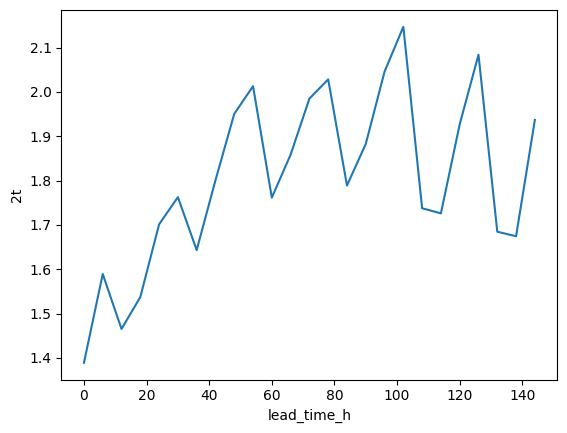

In [31]:
rmse = np.sqrt(mse.mean(["reference_time","point_index"]))
rmse["2t"].assign_coords(lead_time_h=rmse.lead_time.astype("timedelta64[h]")/3600).plot(x="lead_time_h")

In [34]:
# Or use some specialized packages
import xskillscore as xs
vars = ["2t","10si","msl","2d"]
xs.rmse(a=ds_fcst_transformed[vars], b=ds_obs_aligned[vars], dim=["reference_time","point_index"])

ValueError: dimension reference_time on 0th function argument to apply_ufunc with dask='parallelized' consists of multiple chunks, but is also a core dimension. To fix, either rechunk into a single array chunk along this dimension, i.e., ``.chunk(dict(reference_time=-1))``, or pass ``allow_rechunk=True`` in ``dask_gufunc_kwargs`` but beware that this may significantly increase memory usage.

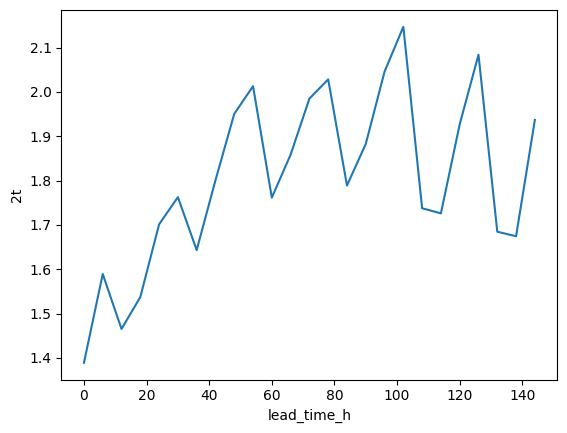

In [40]:
# xskillscore cannot handle chunked dimensions over which it should average
new_chunks = {
    "reference_time":-1, 
    "point_index":-1,
}

rmse2 = xs.rmse(
    a=ds_fcst_transformed[vars].chunk(new_chunks),
    b=ds_obs_aligned[vars].chunk(new_chunks), 
    dim=["reference_time","point_index"],
    skipna=True
)
rmse2["2t"].assign_coords(lead_time_h=rmse2.lead_time.astype("timedelta64[h]")/3600).plot(x="lead_time_h")